In [91]:
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt

import pandas as pd

In [92]:
from utils import read_ami, read_comStock

In [93]:
mypath = 'data'
onlyfiles = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))]

In [94]:
summary_all = {}
for data_file in onlyfiles:
    building_type = data_file.split('-')[1].split('.')[0]
    ami = read_ami(data_file)
    summary_building_type = {}
    for utility in ami.utility.unique():
        ami_utility = ami[ami['utility']==utility]
        building_number = len(ami_utility['building_ID'].unique())
        summary_building_type[utility] = building_number
    summary_all[building_type] = summary_building_type

C:\Users\hongteam\Anaconda3\envs\eulp\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [99]:
_,_,_,_, buildingType_CS = read_comStock()

In [97]:
ami_all = pd.DataFrame(summary_all)

ami_all

,auto_dealership,auto_repair,car_wash,drug_store,full_service_restaurant,gas_station_or_convenience_store,hospital,house_of_worship,large_hotel,large_office,...,primary_school,quick_service_restaurant,retail,R_D,small_hotel,small_office,strip_mall,supermarket,warehouse,warehouse_refrigerated
epb,15.0,61.0,6.0,8.0,44,55.0,NaN,41.0,13.0,1.0,...,8.0,38.0,174,1.0,7.0,219,188,1.0,202.0,NaN
seattle,13.0,60.0,1.0,2.0,51,31.0,NaN,28.0,6.0,4.0,...,13.0,10.0,177,NaN,7.0,239,310,NaN,165.0,NaN
tallahassee,36.0,126.0,6.0,8.0,120,80.0,1.0,32.0,28.0,11.0,...,48.0,73.0,348,2.0,22.0,780,134,NaN,344.0,NaN
veic,4.0,7.0,1.0,1.0,25,7.0,1.0,1.0,46.0,2.0,...,NaN,6.0,40,2.0,NaN,107,77,3.0,64.0,2.0
cherryland,NaN,3.0,NaN,NaN,6,12.0,NaN,NaN,NaN,NaN,...,3.0,NaN,7,NaN,4.0,27,22,NaN,72.0,NaN
horry,NaN,9.0,4.0,2.0,14,16.0,NaN,7.0,1.0,NaN,...,3.0,7.0,52,NaN,2.0,87,41,1.0,55.0,1.0
maine,NaN,NaN,1.0,1.0,4,NaN,NaN,NaN,NaN,1.0,...,2.0,NaN,7,NaN,NaN,10,14,1.0,6.0,NaN
fortcollins,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,2,2,NaN,NaN,NaN


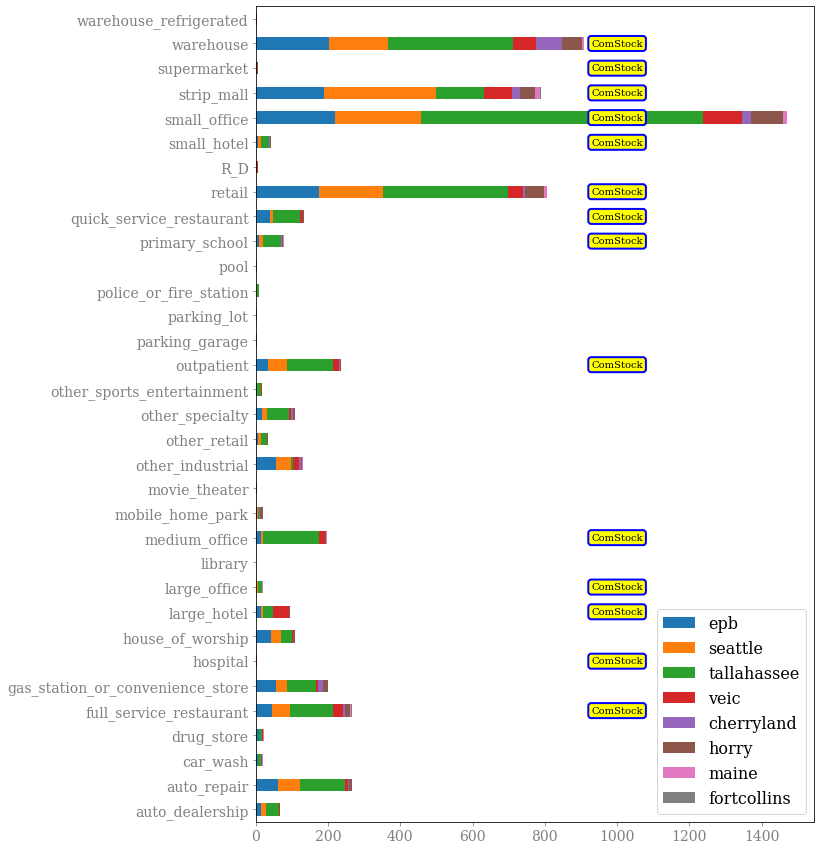

In [101]:
ax = ami_all.T.plot.barh(stacked=True, figsize=(10,15))

label_yloc = {}
for yloc, label in enumerate(ax.get_yticklabels()):
    label_yloc[label.get_text()] = yloc

for building_type in buildingType_CS:
    try:
        yloc= label_yloc[building_type]
        t = ax.text(
        1000, yloc, "ComStock", ha="center", va="center",
        bbox=dict(boxstyle="Round,pad=0.3", fc="yellow", ec="b", lw=2))
    except: 
        pass

plt.savefig('fig/overview.png')

In [103]:
ami_all.sum().sum()

6070.0

In [104]:
len(buildingType_CS)

15